# Time Series Forecasting with Prophet

### Import Libraries

In [64]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', None)

### Reading Data Frame

In [19]:
df = pd.read_csv('Time Series data.csv')
df.head(5)

,Month,Monthly Viewers
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


### Checking the data frame data types

In [20]:
df.dtypes

Month              object
Monthly Viewers     int64
dtype: object

### Converting month into date-time format  

In [21]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month              datetime64[ns]
Monthly Viewers             int64
dtype: object

### Renaming columns into new names

In [26]:
df = df.rename(columns={'Month': 'ds',
                        'Monthly Viewers': 'y'})

df.head(5)

,ds,y
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


### Initialize a model and fit our dataframe df

In [41]:
m = Prophet() 
m.fit(df) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### We want our model to predict for the next 1 years 

In [76]:
future = m.make_future_dataframe(periods=12 * 1, freq='M')

### Going to predict the Y value (Monthly Viewers)

In [80]:
forecast = m.predict(future) 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
114,1969-06-30,1288.877291,1230.395817,1347.666440,1367.720657,1367.720657,1367.720657
115,1969-07-31,1239.702526,1183.148062,1298.573047,1365.765485,1365.514811,1366.030392
116,1969-08-31,1351.475283,1293.729178,1411.123572,1363.810313,1363.079923,1364.512308
117,1969-09-30,1387.829534,1328.139922,1448.175494,1361.918212,1360.517214,1363.140586
118,1969-10-31,1415.562377,1362.312170,1475.397238,1359.963040,1357.707183,1361.829639
119,1969-11-30,1322.640627,1267.922236,1378.017215,1358.070939,1354.920591,1360.660013
120,1969-12-31,1403.494415,1344.186442,1460.546735,1356.115767,1352.045595,1359.828202
121,1970-01-31,1406.811784,1352.872505,1466.144735,1354.160596,1349.192824,1358.515166
122,1970-02-28,1383.442983,1328.715940,1442.864089,1352.394635,1346.495494,1357.779790
123,1970-03-31,1400.049603,1350.064766,1460.207581,1350.439463,1343.274290,1357.176977


In the table ds, as we know, is the time series data. yhat is the prediction, yhat_lower and yhat_upper are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels).

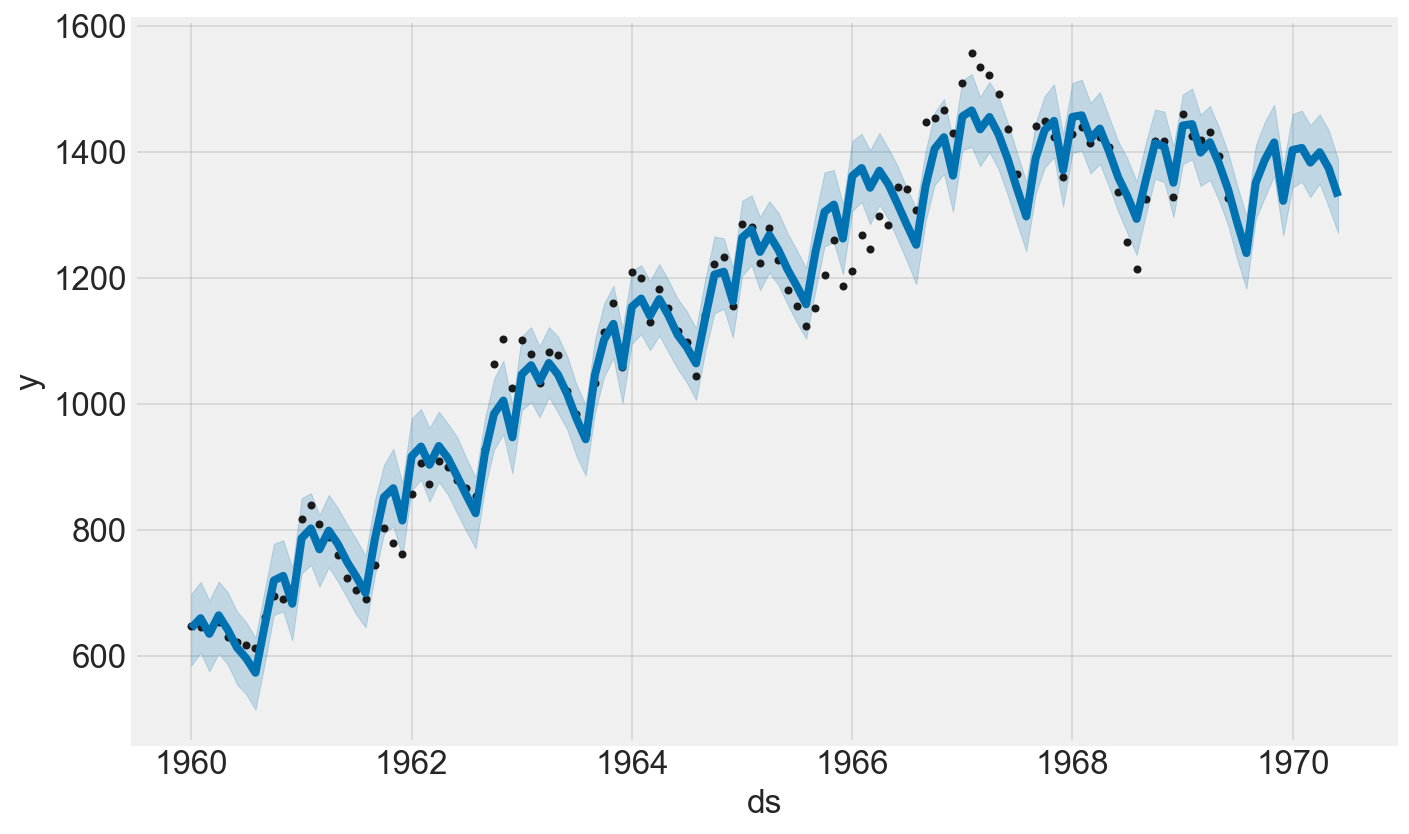

In [81]:
fig1 = m.plot(forecast) 

Above image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data.

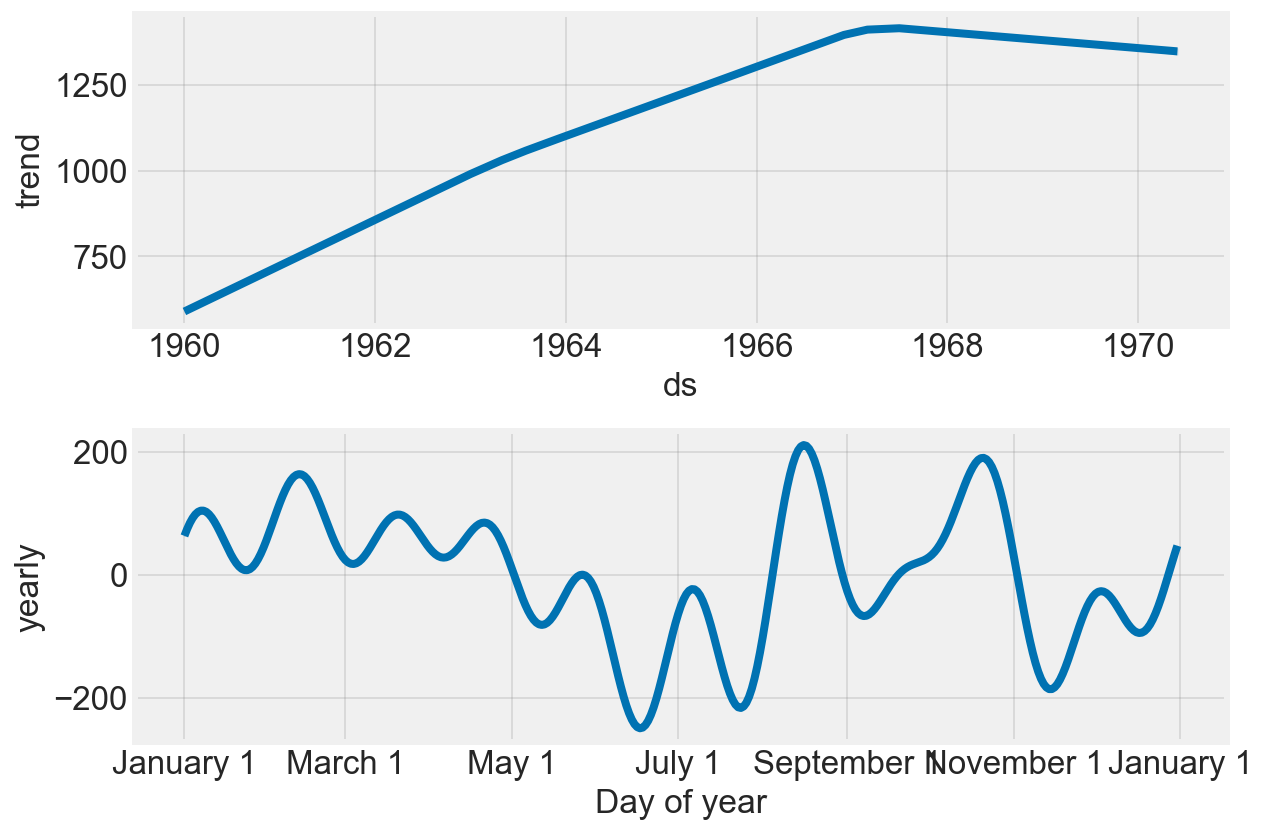

In [82]:
fig2 = m.plot_components(forecast) 

Above images shows the trends and seasonality(in a year) of the time series data. We can see there is an increasing trend, meaning the number of Monthly Viewers has increased over time. If we look at the seasonality graph, we can see that around Augudt mid and November is the time with most Viewer at a given year.

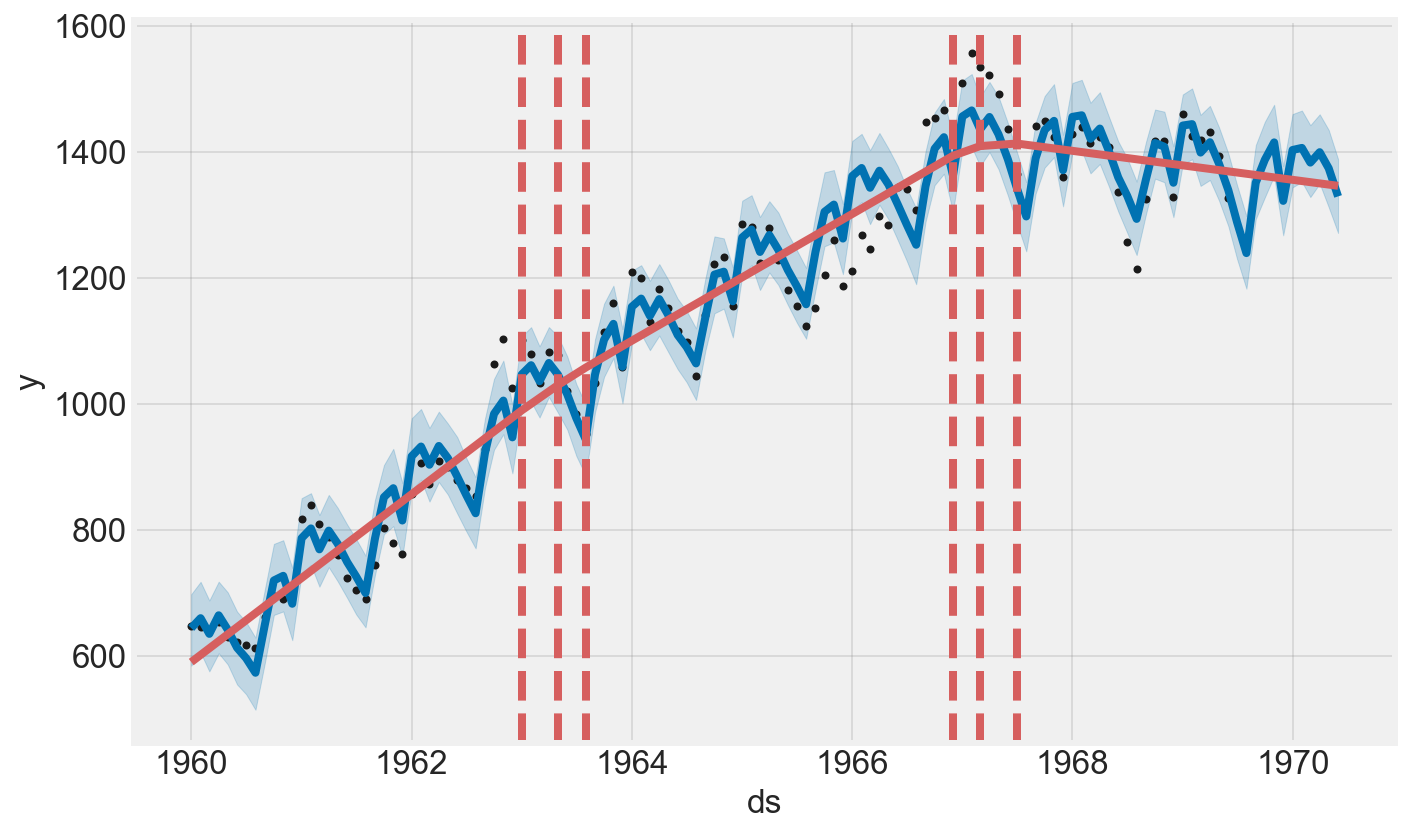

In [83]:
fig = m.plot(forecast) 
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Above image changepoints to indicate the time in rapid trend growths. The dotted red lines show the time when there was a rapid change in the trend of the viewers.

In [85]:
forecast.iloc[114:124][['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
114,1969-06-30,1288.877291,1230.395817,1347.666440,1367.720657,1367.720657,1367.720657
115,1969-07-31,1239.702526,1183.148062,1298.573047,1365.765485,1365.514811,1366.030392
116,1969-08-31,1351.475283,1293.729178,1411.123572,1363.810313,1363.079923,1364.512308
117,1969-09-30,1387.829534,1328.139922,1448.175494,1361.918212,1360.517214,1363.140586
118,1969-10-31,1415.562377,1362.312170,1475.397238,1359.963040,1357.707183,1361.829639
119,1969-11-30,1322.640627,1267.922236,1378.017215,1358.070939,1354.920591,1360.660013
120,1969-12-31,1403.494415,1344.186442,1460.546735,1356.115767,1352.045595,1359.828202
121,1970-01-31,1406.811784,1352.872505,1466.144735,1354.160596,1349.192824,1358.515166
122,1970-02-28,1383.442983,1328.715940,1442.864089,1352.394635,1346.495494,1357.779790
123,1970-03-31,1400.049603,1350.064766,1460.207581,1350.439463,1343.274290,1357.176977


#### Note: last 10 month predicted value shown above (yhat is predicted value)